# ML


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
import matplotlib.pyplot as plt


In [40]:
df = pd.read_csv('../csvFiles/medidasPerRepetition.csv', dtype=object) # salida de leer_dataset.ipynb
df.head() # visualizacion de la cabecera

,SubjectID,GestureLabel,RepetitionNumber,CorrectLabel,Position,ArmsTogetherAngle_standardDeviation,ArmsTogetherAngle_Maximum,ArmsTogetherAngle_Minimum,ArmsTogetherAngle_Mean,ArmsTogetherAngle_Median,...,WristAngleRight_standardDeviation,WristAngleRight_Maximum,WristAngleRight_Minimum,WristAngleRight_Mean,WristAngleRight_Median,KneeAngleRight_standardDeviation,KneeAngleRight_Maximum,KneeAngleRight_Minimum,KneeAngleRight_Mean,KneeAngleRight_Median
0,101,0,1,1,stand,10.670341993092354,48.059652761639576,0.0048807662354137,21.234671517209446,22.83289147945006,...,27.747671544455784,179.99004458952922,1.895342254750395,158.3796393196956,167.5754479867348,33.21825901846228,179.96934757003004,23.627158746328853,152.77402908958072,168.526653468215
1,102,0,10,1,chair,12.916413412177558,165.07646943448404,1.289325958760638,23.98376953134508,22.54033601481008,...,31.99572402744675,179.93282577999278,0.3364676201884472,157.58054518853646,169.24449943332698,48.365156564099046,179.92348822231432,0.1283422443610501,141.18107432174696,173.60922079773533
2,102,0,11,1,chair,7.013930067617385,49.24618070566771,0.1209929594195576,21.95525314293939,22.401926795979254,...,33.27563948143619,179.98243741516615,0.1774984781081361,156.6778786388648,169.34187787891832,50.52797943663096,179.95026227783754,0.0635814082810828,142.12820195704057,174.23312184258162
3,102,0,12,1,chair,5.000322644745113,33.28243506266367,1.897672146230762,20.78844720302887,21.778025232022262,...,38.65090118051891,179.9385717238046,0.8063643067463825,151.63843805754541,167.54069579313867,53.012206560302246,179.97589943679105,0.0102929998186067,147.72526433711266,175.24697173885224
4,201,0,13,2,wheelchair,9.603500790057916,39.12405897390368,0.5542027645228198,13.140236375900592,9.921171176844595,...,38.45315891548698,179.98166657027105,4.256657550066159,152.5031049688768,170.6214059295001,83.00999004563369,179.75752719635332,0.0516894372294613,120.57424546783201,178.20503193476813


In [41]:
# preparar el dataset 
df = df.drop(['Position'], axis = 1)

## 1. Dividir el dataset en train y test

In [42]:
# Dividiemos en train y test
df_train, df_test = train_test_split(df, test_size = 0.3)

# Dividimos el conjunto de train en varibales independientes y en target
train_X = df_train.drop(['GestureLabel'], axis = 1)
train_y = pd.DataFrame(df_train['GestureLabel'])

# Dividimos el conjunto de test
test_X = df_test.drop(['GestureLabel'], axis = 1)
test_y = pd.DataFrame(df_test['GestureLabel'])

## 2. Modelos

In [43]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X,train_y) #entrenamos el algoritmo

C:\Users\nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

KNN Model : 0.9247311827956989


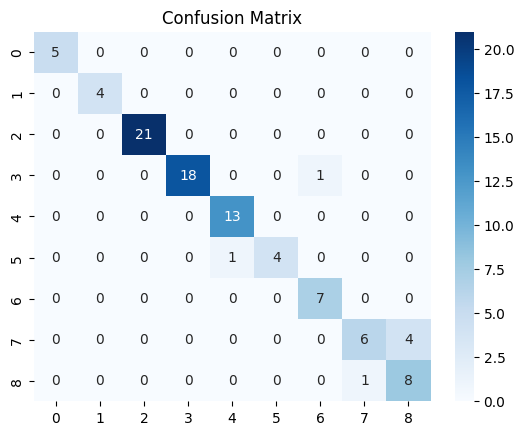

In [44]:
prediction=knn.predict(test_X)
print('KNN Model :',accuracy_score(prediction,test_y))

# Plot confusion matrix. 
cm = confusion_matrix(test_y, prediction)
ax = plt.axes()
sns.heatmap(cm, annot=True, cmap="Blues" )
ax.set_title('Confusion Matrix')
plt.show()

In [45]:
report = classification_report(test_y, prediction)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        21
           3       1.00      0.95      0.97        19
           4       0.93      1.00      0.96        13
           5       1.00      0.80      0.89         5
           6       0.88      1.00      0.93         7
           7       0.86      0.60      0.71        10
           8       0.67      0.89      0.76         9

    accuracy                           0.92        93
   macro avg       0.93      0.92      0.91        93
weighted avg       0.93      0.92      0.92        93



* Confusion matrix: cuanto más valores en la diagonal mejor
* Precision: cuanto más alta mejor
* Recall: cuanto más alta mejor
* F1-measure o F-score: cuanto más alta mejor
* Accuracy: cuanto más alta mejor